In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from utils import get_train_test
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import dateparser 

C:\Users\VIKAS\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(100) #for reproducibility

In [3]:
def read_data():
    data = pd.read_csv('google_dataset.csv')
    # data = pd.read_csv('daily_MSFT.csv')
    return data['Close'][::-1] #reversing the stock prices from previous date to till date

In [4]:
def create_XY(data): #converting the univariate time series into multivariate time series(making it supervised learning)
    X = data
    Y = X[1:]
    X = X[0:-1]
    return X,Y

In [5]:
def scale_data(data): #scaling data between 0 and 1 because LSTMs are sensitive to the scale of the input data.
    scale = MinMaxScaler(feature_range=(0, 1))
    scale = scale.fit(np.array(data).reshape(-1,1))
    return scale

In [6]:
import numpy as np
def get_train_test(train_size=0.9): #dividing the dataset into train and test set. Default train size is 90%
    target = read_data()
    train, test = target[0:int(train_size*len(target))], target[int(train_size*len(target)):] 
    scale = scale_data(train) #fir the scaler model on train data
    train = scale.transform (train.values.reshape(-1,1)) #scaling train set
    test = scale.transform(test.values.reshape(-1,1)) #scaling test set
    x_train, y_train = create_XY(train) # creating supervised train data
    x_test, y_test = create_XY(test) # creating supervised test data
    return x_train, y_train, x_test, y_test, scale

In [7]:
x_train, y_train, x_test, y_test, scale = get_train_test() # train test split of dataset

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1])) # reshaping data for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1])) # reshaping data for LSTM

In [9]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
model.load_weights('weights/google.hdf5') #loading the trained model weights

In [11]:
test = model.predict(x_test) #testing the model on test set

In [12]:
y_true = scale.inverse_transform(y_test).ravel()  # inverse scaling of the original test data. inverse scaling is done to get the original stock value which was converted into 0 and 1 range

In [13]:
y_pred = scale.inverse_transform(test).ravel() # inverse scaling of the predicted data

In [14]:
plot = pd.DataFrame(np.stack([y_true,y_pred],axis=1), columns=["True","Predicted"]) #creating dataframe of true and predicted values for ploting

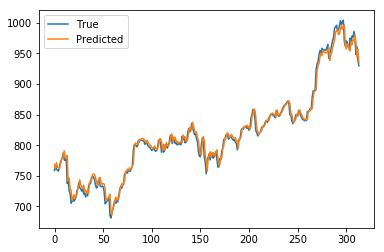

In [19]:
plot.plot()

In [20]:
pyplot.show()

In [21]:
err = np.sqrt(mean_squared_error(y_true, y_pred)) #calculation of root mean square error

In [22]:
print ("Root Mean Squared Error:", err)

Root Mean Squared Error: 9.085965958944598
